<a href="https://colab.research.google.com/github/sofiavillegas07/Anal-tica/blob/main/Reto_Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargar librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from functools import cmp_to_key
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')


1. Se cargan los archivos

      White  HS GPA   SAT    GPA  College Parent  Grad
0         1    4.14  1410  2.949               1     1
1         1    3.30  1260  2.789               1     1
2         0    4.30   950  2.851               0     1
3         1    4.29  1290  3.533               1     1
4         1    4.20  1350  3.301               1     1
...     ...     ...   ...    ...             ...   ...
1995      1    3.18  1400  3.118               1     1
1996      0    3.82  1230  2.640               1     0
1997      0    3.74  1140  2.283               0     0
1998      1    3.75  1260  3.193               1     1
1999      0    3.08   950  2.090               0     0

[2000 rows x 6 columns]
Esta es la matriz de correlacion:
                    White    HS GPA       SAT       GPA  College Parent  \
White           1.000000  0.130981  0.191930  0.194132       -0.005987   
HS GPA          0.130981  1.000000  0.346767  0.376932        0.020068   
SAT             0.191930  0.346767  1.000000  0.260927    

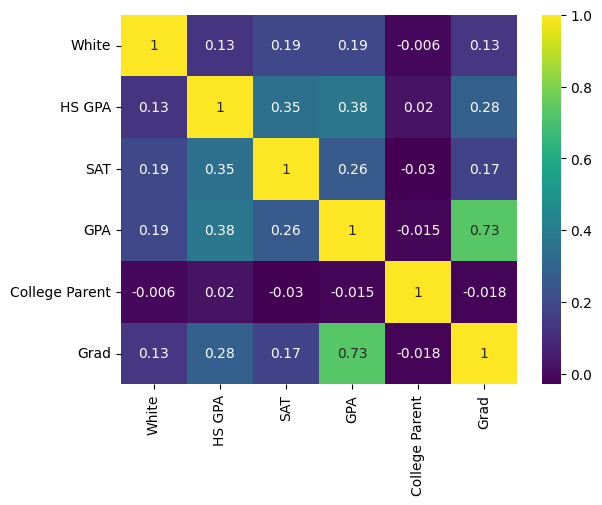

In [ ]:
nxl='/content/drive/MyDrive/Analitica de negocios /4. BD_Parcial_L_int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)

XDB=XDB[['White','HS GPA','SAT','GPA','College Parent','Grad']]

XD=np.array(XDB[['White','HS GPA','SAT','GPA','College Parent']])
yd=np.array(XDB[['Grad']])
print(XDB)

corr=XDB.corr()
print("Esta es la matriz de correlacion:\n", corr)

corr['Grad'].sort_values(ascending=False)[1:]
sns.heatmap(XDB.corr(),annot=True, cmap = 'viridis');



2. Modelo Naive Bayes

In [ ]:
Cantidad=len(XDB)
print('La cantidad de datos en la base de datos es:', Cantidad)

XDB_GRAD=np.where(yd==0)[0]
len(XDB_GRAD)
pct_GRAD=len(XDB_GRAD)/Cantidad*100
print('El porcentaje de graduados es:', pct_GRAD,'%')

XDB_NOGRAD=np.where(yd==1)[0]
len(XDB_NOGRAD)
pct_NOGRAD=len(XDB_NOGRAD)/Cantidad*100
print('El porcentaje de graduados es:', pct_NOGRAD,'%')


La cantidad de datos en la base de datos es: 2000
El porcentaje de graduados es: 30.8 %
El porcentaje de graduados es: 69.19999999999999 %


In [ ]:
mnb=GaussianNB()
mnb.fit(XD,yd)
ydp=mnb.predict(XD)

u=mnb.theta_
sigma=np.sqrt(mnb.var_)
LI=u-sigma
LS=u+sigma

print("La media de las variables por categoria",u)
print(u)
print("El limite inferior de la variación de las variables por categoría es",LI)
print(LI)
print("El limite superior de la variación de las variables por categoría es",LS)
print(LS)

cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es")
print(cm)

La media de las variables por categoria [[5.86038961e-01 3.70939935e+00 1.23485390e+03 2.43128247e+00
  6.98051948e-01]
 [7.21098266e-01 3.91479769e+00 1.28854769e+03 3.28720303e+00
  6.79913295e-01]]
[[5.86038961e-01 3.70939935e+00 1.23485390e+03 2.43128247e+00
  6.98051948e-01]
 [7.21098266e-01 3.91479769e+00 1.28854769e+03 3.28720303e+00
  6.79913295e-01]]
El limite inferior de la variación de las variables por categoría es [[9.34763992e-02 3.33244695e+00 1.08319860e+03 1.95529138e+00
  2.38926686e-01]
 [2.72616229e-01 3.62226610e+00 1.15210925e+03 2.96953734e+00
  2.13381638e-01]]
[[9.34763992e-02 3.33244695e+00 1.08319860e+03 1.95529138e+00
  2.38926686e-01]
 [2.72616229e-01 3.62226610e+00 1.15210925e+03 2.96953734e+00
  2.13381638e-01]]
El limite superior de la variación de las variables por categoría es [[1.07860152e+00 4.08635175e+00 1.38650919e+03 2.90727356e+00
  1.15717721e+00]
 [1.16958030e+00 4.20732928e+00 1.42498613e+03 3.60486872e+00
  1.14644495e+00]]
[[1.07860152e+00 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.1 Evaluación del modelo

In [ ]:
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
print("La Exactitud es", Exactitud)

TE=(FN+FP)/len(yd)
print("La Tasa de Error es", TE)

Sensibilidad=VP/(VP+FN)
print("La Sensibilidad es", Sensibilidad)

Especificidad=VN/(VN+FP)
print("La Especificidad es", Especificidad)

Xun1=np.array([[1,4,1260,1.9,1]])
ydun1=mnb.predict(Xun1)
print('La categoria a la que pertenece la persona 1 es:', ydun1)

Xun2=np.array([[1,2.91,1090,2.719,1]])
ydun2=mnb.predict(Xun2)
print('La categoria a la que pertenece la persona 2 es:', ydun2)

Xun3=np.array([[0,3.58,1210,3.319,1]])
ydun3=mnb.predict(Xun3)
print('La categoria a la que pertenece la persona 3 es:', ydun3)

La Exactitud es 0.867
La Tasa de Error es 0.133
La Sensibilidad es 0.9263005780346821
La Especificidad es 0.7337662337662337
La categoria a la que pertenece la persona 1 es: [0]
La categoria a la que pertenece la persona 2 es: [0]
La categoria a la que pertenece la persona 3 es: [1]


3. Creación del modelo - Desicion Tree

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4) #Dividido en 4 niveles
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

#Evaluamos el modelo
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

Ex=(VN+VP)/(VN+VP+FN+FP) #Que porcentaje de los datos pronostico correctamente
print("La exactitud alcanzada por el modelo es:", Ex)
Se=VP/(FN+VP) #Que porcentaje de los datos positivos pronosticado correctamente
print("La sensibilidad alcanzada por el modelo es:", Se)
Es=VN/(VN+FP) #Que porcentaje de los datos positivos pronosticado correctamente
print("La especificidad alcanzada por el modelo es:", Es)

[[ 422  194]
 [   2 1382]]
La exactitud alcanzada por el modelo es: 0.902
La sensibilidad alcanzada por el modelo es: 0.9985549132947977
La especificidad alcanzada por el modelo es: 0.685064935064935


3.1 Graficar el arbol

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import matplotlib.pyplot as plt

vs = ['White', 'HS GPA', 'SAT','GPA','College Parent']
dot_graph=export_graphviz(mar, feature_names=vs)
graph = graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

XDB2=pd.read_excel(nxl,sheet_name=1)
XDB2=XDB2.dropna()
XDB2.head(100)

XD2=np.array(XDB2[['White','HS GPA','SAT','GPA','College Parent']]) #Datos de entrada
print(XD2)

ydp2=mar.predict(XD2)
print(ydp2)


[[1.000e+00 4.000e+00 1.260e+03 1.900e+00 1.000e+00]
 [1.000e+00 2.910e+00 1.090e+03 2.719e+00 1.000e+00]
 [0.000e+00 3.580e+00 1.210e+03 3.319e+00 1.000e+00]]
[0 1 1]


4. KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster de la primera persona: [3]
Cluster de la segunda persona: [0]
Cluster de la tercera persona: [1]


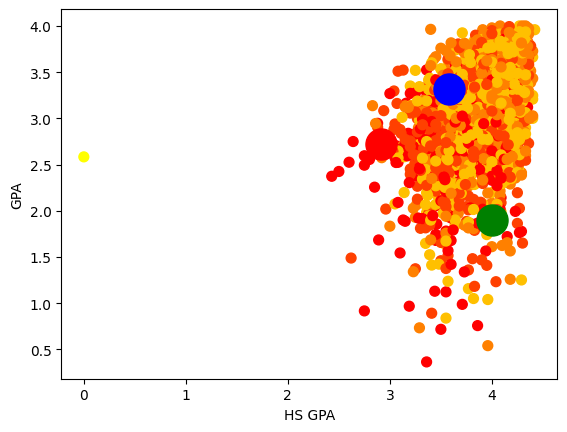

El numero de personas que no se graduaron en el cluster 0 es:  138
El porcentaje de personas que no se graduaron en el cluster 0 es:  51.301115241635685 %


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)

mkm=KMeans(n_clusters=5, init='random', random_state=42)
mkm.fit(XD,yd)

XDPersona1=np.array([[1,4,1260,1.9,1]])
print('Cluster de la primera persona:', mkm.predict(XDPersona1))

XDPersona2=np.array([[1,2.91,1090,2.719,1]])
print('Cluster de la segunda persona:', mkm.predict(XDPersona2))

XDPersona3=np.array([[0,3.58,1210,3.319,1]])
print('Cluster de la tercera persona:', mkm.predict(XDPersona3))


labels=np.array(mkm.labels_).reshape(2000,1)

plt.scatter(XD[:,1],XD[:,3],c=labels,s=50,cmap='autumn')
plt.scatter(XDPersona1[:,1], XDPersona1[:,3], marker='o',s=500,facecolors='green')
plt.scatter(XDPersona2[:,1], XDPersona2[:,3], marker='o',s=500,facecolors='red')
plt.scatter(XDPersona3[:,1], XDPersona3[:,3], marker='o',s=500,facecolors='blue')
plt.xlabel('HS GPA'); plt.ylabel('GPA')
plt.show()

c00=len(np.where((labels==00) & (yd==0))[0])
c01=len(np.where((labels==00) & (yd==1))[0])
print("El numero de personas que no se graduaron en el cluster 0 es: ",c00)
print("El porcentaje de personas que no se graduaron en el cluster 0 es: ",c00/(c00+c01)*100,"%")


In [ ]:
c00=len(np.where((labels==00) & (yd==0))[0])
c01=len(np.where((labels==00) & (yd==1))[0])
print("El numero de personas que no se graduaron en el cluster 0 es: ",c00)
print("El porcentaje de personas que no se graduaron en el cluster 0 es: ",c00/(c00+c01)*100,"%")
print("El numero de personas que se graduaron en el cluster 0 es: ",c01)
print("El porcentaje de personas que se graduaron en el cluster 0 es: ",c01/(c00+c01)*100,"%")

c10=len(np.where((labels==1) & (yd==0))[0])
c11=len(np.where((labels==1) & (yd==1))[0])
print("El numero de personas que no se graduaron en el cluster 1 es: ",c10)
print("El porcentaje de personas que no se graduaron en el cluster 1 es: ",c10/(c10+c11)*100,"%")
print("El numero de personas que se graduaron en el cluster 1 es: ",c11)
print("El porcentaje de personas que se graduaron en el cluster 1 es: ",c11/(c10+c11)*100,"%")

c20=len(np.where((labels==2) & (yd==0))[0])
c21=len(np.where((labels==2) & (yd==1))[0])
print("El numero de personas que no se graduaron en el cluster 2 es: ",c20)
print("El porcentaje de personas que no se graduaron en el cluster 2 es: ",c20/(c20+c21)*100,"%")
print("El numero de personas que se graduaron en el cluster 2 es: ",c21)
print("El porcentaje de personas que se graduaron en el cluster 2 es: ",c21/(c20+c21)*100,"%")

c30=len(np.where((labels==3) & (yd==0))[0])
c31=len(np.where((labels==3) & (yd==1))[0])
print("El numero de personas que no se graduaron en el cluster 3 es: ",c30)
print("El porcentaje de personas que no se graduaron en el cluster 3 es: ",c30/(c30+c31)*100,"%")
print("El numero de personas que se graduaron en el cluster 3 es: ",c31)
print("El porcentaje de personas que se graduaron en el cluster 3 es: ",c31/(c30+c31)*100,"%")

c40=len(np.where((labels==4) & (yd==0))[0])
c41=len(np.where((labels==4) & (yd==1))[0])
print("El numero de personas que no se graduaron en el cluster 4 es: ",c40)
print("El porcentaje de personas que no se graduaron en el cluster 4 es: ",c40/(c40+c41)*100,"%")
print("El numero de personas que se graduaron en el cluster 4 es: ",c41)
print("El porcentaje de personas que se graduaron en el cluster 4 es: ",c41/(c40+c41)*100,"%")

clusters=mkm.cluster_centers_
print("Las caracteristicas de cada cluster son:\n",clusters)


El numero de personas que no se graduaron en el cluster 0 es:  138
El porcentaje de personas que no se graduaron en el cluster 0 es:  51.301115241635685 %
El numero de personas que se graduaron en el cluster 0 es:  131
El porcentaje de personas que se graduaron en el cluster 0 es:  48.698884758364315 %
El numero de personas que no se graduaron en el cluster 1 es:  183
El porcentaje de personas que no se graduaron en el cluster 1 es:  33.03249097472924 %
El numero de personas que se graduaron en el cluster 1 es:  371
El porcentaje de personas que se graduaron en el cluster 1 es:  66.96750902527076 %
El numero de personas que no se graduaron en el cluster 2 es:  118
El porcentaje de personas que no se graduaron en el cluster 2 es:  24.18032786885246 %
El numero de personas que se graduaron en el cluster 2 es:  370
El porcentaje de personas que se graduaron en el cluster 2 es:  75.81967213114754 %
El numero de personas que no se graduaron en el cluster 3 es:  176
El porcentaje de personas

*Analisis*
Se implementaron 3 modelos, Naive Bayes, Arbol de decisión y K-Means para pronosticar si una persona se va a graduar en 4 años. Se utilizaron las siguientes variables de entrada 'White','HS GPA','SAT','GPA','College Parent' y 'Grad' como la variable de salida.
La matriz de correlacion de las variables que tenian mayor correlacion fueron la de GPA y Grad, con un coeficiente de 0.73, teniendo en cuenta la variable de salida. Las variables con mayor correlacion son HS GPA y GPA, con un coeficiente de 0.38

Modelo Naive Bayes: el grupo que logro la mayor calificacion en HS GPS fue el de las personas que se graduan (1), igual que para el promedio de la universidad. La exactitud fue de 0.88, es un numero alto que indica la eficiencia de este modelo. La sensibilidad fue de 0.93. La especificidad fue de 0.75 y muestra que no tiene la misma eficiencia al ver las personas que no se graduan. Los individuos 1 y 2 estan en la categoria de no graduados, mientras el 3 esta en la categoria de graduados.

Modelo de Decision Tree:la exactitud es de 0.90, la cual es mayor a la del modelo Naive Bayes y muestra que es mas fuerte para tener los resultados apropiados. La sensibilidad alcanzo casi un 100%, que supera la sensibilidad del modelo Naive Bayes lo cual muestra la capacidad del modelo de identificar los graduados. La especificidad es de 0.69, con menos capacidad de identificar los no graduados.

Se destacan tres nodos puros:
1. GPA<= 2.653 [413]
2. GPA>2.653 AND GPA>3.041[1075]
3. GPA>2.653 AND GPA<==3.041 AND HS GPA>4.365

La primera persona pertenece a GPA<==2.653[413] la segunda persona pertenece a GPS>=3.041 AND HS GPA<=4.365 AND GPA<=3.037[194,307] La tercera persona pertenece a GPA>2.653 AND GPA>3.042[1075]

Modelo KMeans, el cluster con mayor calificacion HS GPA es el cluster 2 y el GPAfue el cluster dos tambien. La exactitud de 0.62 fue mucho mayor  que los otros modelos, mostrando que es el menos desempeño tiene. La sensibilidad fue de 0.74, tambien mostrando menos eficiencia para saber la cantidad de graduados. La especificidad fue de 0.42, tambien siendo mucho menor que los otros modelos y no identificando de la mejor manera los no graduados.
La mayor cantidad de personas las tiene el cluster 3, con 510 personas y un porcentaje de 74%
Cada persona pertenece al cluster: persona 1-3 persona 2-0 persona 3-1
